In [ ]:
import tweepy
import pandas as pd
import os
# from dotenv import main
import time
import matplotlib.pyplot as plt


In [ ]:
# def configure():
#     main.load_dotenv()
# configure()


In [ ]:
API_KEY = "m16yunHsIGMPcAJpvsBoiApad"
API_KEY_SECRET = "DcAZnVKKkQhANuzXsdDPL3wPMIIYmisq9EUPRRmLA9fAF9ejrN"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAPCXYwEAAAAA40Kw07GaSaWLPoKtPnUO0JkXcWg%3DJjac93PMbNcOtgd85AyHcuPcaR0rWfYiqdjK6Ej7orzb01CisU"
ACCESS_TOKEN = "1489931304489472003-YPvyPWqb1DKCdosBo5Siwhg65jL4eL"
ACCESS_TOKEN_SECRET = "MREvu8RJPUeFlDu2RASXmzX9Pi87ZniMn8vs8wcUdiNta"


In [ ]:
auth = tweepy.OAuthHandler(API_KEY, API_KEY_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)


In [ ]:
def get_tweets(query):
    query = query + "-filter:retweets"
    tweets = tweepy.Cursor(api.search,q=query,lang="en").items(1000)
    tw_copy = []
    for tweet in tweets:
        tw_copy.append(tweet)
    print(f"{len(tw_copy)} tweets found for {query}")
    return tw_copy

In [ ]:
def get_tweet_df(species):
    tweets_df = pd.DataFrame()
    for s in species:
        start = time.process_time()
        tweets_copy = get_tweets(s)
        end = time.process_time()
        print(f"Time for keyword {s}: {end-start}")
        # time.sleep(10)
        if len(tweets_copy) >= 1000:
          SLEEP_TIME = 120
        elif len(tweets_copy) >= 100:
          SLEEP_TIME = 30
        else:
          SLEEP_TIME = 15
        for tweet in tweets_copy:
            hashtags = []
            try:
                for hashtag in tweet.entities["hashtags"]:
                    hashtags.append(hashtag)
                text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
            except:
                pass
            tweets_df = pd.concat([tweets_df,pd.DataFrame({
                'user_name': tweet.user.name,
                "user_description": tweet.user.description,
                "user_location": tweet.user.location,
                "user_verification": tweet.user.verified,
                "date": tweet.created_at,
                "text": text,
                "hashtags": [hashtags if hashtags else None],
                "source": tweet.source
                })],axis=0)

            tweets_df = tweets_df.reset_index(drop=True)
        time.sleep(SLEEP_TIME)
    return tweets_df

In [ ]:
CES = [] #critically endangered species
with open('Critically Endangered Species.txt','r') as f:
    l = f.readlines()
    for name in l:
        t = ''.join(i for i in name if not i.isdigit())
        t = t.replace('.','')
        CES.append(t)
f.close()
print(CES[0])


﻿ Sumatran rhinoceros



In [ ]:
PES = [] #possibly extinct species
with open('Possibly Extinct.txt','r') as f:
    l = f.readlines()
    for name in l:
        t = ''.join(i for i in name if not i.isdigit())
        t = t.replace('.','')
        PES.append(t)
f.close()
print(PES[0])


 Northern white rhinoceros



In [ ]:
VS = [] #vulnerable species
with open('Vulnerable Species.txt','r') as f:
    l = f.readlines()
    for name in l:
        t = ''.join(i for i in name if not i.isdigit())
        t = t.replace('.','')
        VS.append(t)
f.close()
print(VS[0])


﻿ Long-tailed pangolin



In [ ]:
Tweets_C = get_tweet_df(CES)

10 tweets found for ﻿ Sumatran rhinoceros
-filter:retweets
Time for keyword ﻿ Sumatran rhinoceros
: 0.03536234100000968
0 tweets found for  Eastern black rhinoceros
-filter:retweets
Time for keyword  Eastern black rhinoceros
: 0.0158237870000022
0 tweets found for  South-central black rhinoceros
-filter:retweets
Time for keyword  South-central black rhinoceros
: 0.01647482699999614
0 tweets found for  African wild donkey
-filter:retweets
Time for keyword  African wild donkey
: 0.023594344999992245
2 tweets found for  Javan rhinoceros
-filter:retweets
Time for keyword  Javan rhinoceros
: 0.029082458000004863
0 tweets found for  Tonkin black crested gibbon
-filter:retweets
Time for keyword  Tonkin black crested gibbon
: 0.015437537000011048
0 tweets found for  West Yunnan black crested gibbon
-filter:retweets
Time for keyword  West Yunnan black crested gibbon
: 0.016142497999993566
0 tweets found for  Central Yunnan black crested gibbon
-filter:retweets
Time for keyword  Central Yunnan b

In [ ]:
Tweets_C

,user_name,user_description,user_location,user_verification,date,text,hashtags,source
0,PanfilLera,,,False,2022-06-20 02:22:32,A little good news. The Sumatran rhinoceros ar...,None,Twitter Web App
1,GehlhausenLarhonda,,,False,2022-06-20 02:10:38,A little good news. The Sumatran rhinoceros ar...,None,Twitter Web App
2,Mike Hudema,#Climate Campaigner focusing on addressing the...,Unceded Squamish Territory,True,2022-06-17 23:32:03,A little good news. The Sumatran rhinoceros ar...,None,Buffer
3,OPH Rescue,OPH Rescue brings dogs and cats from overcrowd...,"VA, DC, MD, PA",False,2022-06-16 15:14:45,Sumatran Rhinoceros has his smile camera ready...,None,Twitter Web App
4,Sudan the Rhino fans,"Sudan, the last male Northern White Rhino, is ...",Canada,False,2022-06-14 16:13:38,"@burtonlim Hi Mr. Lim, I wanted to explore don...",None,Twitter for iPad
...,...,...,...,...,...,...,...,...
3237,Palm Oil Detectives,An exciting non-profit platform & consumer web...,"Wellington, New Zealand",False,2022-06-17 20:24:00,"Sumatran #Elephants are rapidly disappearing, ...","[{'text': 'Elephants', 'indices': [9, 19]}, {'...",Twitter Web App
3238,I N D I G I D A D D I E Ⓥ 🇺🇦,(he/him/hastiin) Arizona State Alumnus • grad ...,"York, England",False,2022-06-17 17:32:52,Sumatran Elephant: considered to be the smalle...,None,Twitter for iPhone
3239,I N D I G I D A D D I E Ⓥ 🇺🇦,(he/him/hastiin) Arizona State Alumnus • grad ...,"York, England",False,2022-06-17 17:32:47,There are 3 types of subspecies of Asian Eleph...,None,Twitter for iPhone
3240,Michele Whitby,What a wonderful world it would be without Pal...,"Aquitaine, France",False,2022-06-13 16:08:33,If there’s anything u can do today &amp; from ...,None,Twitter Web App


In [ ]:
Tweets_C.to_csv("Tweets_CE_Species.csv")

In [ ]:
Tweets_V = get_tweet_df(VS)

0 tweets found for ﻿ Long-tailed pangolin
-filter:retweets
Time for keyword ﻿ Long-tailed pangolin
: 0.021531877000000144
4 tweets found for  Ground pangolin
-filter:retweets
Time for keyword  Ground pangolin
: 0.028204265999999922
193 tweets found for  Dugong
-filter:retweets
Time for keyword  Dugong
: 0.2475211899999996
1 tweets found for  Amazonian manatee
-filter:retweets
Time for keyword  Amazonian manatee
: 0.03040032799999981
13 tweets found for  West Indian manatee
-filter:retweets
Time for keyword  West Indian manatee
: 0.031382906000000155
0 tweets found for  African manatee
-filter:retweets
Time for keyword  African manatee
: 0.016198200000000718
17 tweets found for  Mountain zebra
-filter:retweets
Time for keyword  Mountain zebra
: 0.052648533000000164
8 tweets found for  Indian rhinoceros
-filter:retweets
Time for keyword  Indian rhinoceros
: 0.02902453299999941
2 tweets found for  South American tapir
-filter:retweets
Time for keyword  South American tapir
: 0.03023200099

TweepError: ignored

In [ ]:
Tweets_V

In [ ]:
Tweets_V.to_csv("Tweets_V_species.csv")

In [ ]:
Tweets_E = get_tweet_df(PES)

TweepError: ignored

In [ ]:
Tweets_E

NameError: ignored

In [ ]:
Tweets_E.to_csv("Tweets_PE_species.csv")

## Data Analysis

## preprocessing


In [ ]:
Tweets_C = pd.read_csv('/content/Tweets_CE_Species.csv')

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [ ]:
def text_prep(x):
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
    
     return lemmatize

In [ ]:
from nltk.corpus import wordnet

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('corpus')

[nltk_data] Error loading corpus: Package 'corpus' not found in index


False

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
tweets_df = Tweets_C.copy()

In [ ]:
preprocess_tag = [text_prep(i) for i in tweets_df['text']]
tweets_df["preprocess_txt"] = preprocess_tag

In [ ]:
tweets_df['total_len'] = tweets_df['preprocess_txt'].map(lambda x: len(x))

In [ ]:
tweets_df.head()

,Unnamed: 0,user_name,user_description,user_location,user_verification,date,text,hashtags,source,preprocess_txt,total_len
0,0,PanfilLera,NaN,NaN,False,2022-06-20 02:22:32,A little good news. The Sumatran rhinoceros ar...,NaN,Twitter Web App,"[little, good, news, sumatran, rhinoceros, cri...",26
1,1,GehlhausenLarhonda,NaN,NaN,False,2022-06-20 02:10:38,A little good news. The Sumatran rhinoceros ar...,NaN,Twitter Web App,"[little, good, news, sumatran, rhinoceros, cri...",26
2,2,Mike Hudema,#Climate Campaigner focusing on addressing the...,Unceded Squamish Territory,True,2022-06-17 23:32:03,A little good news. The Sumatran rhinoceros ar...,NaN,Buffer,"[little, good, news, sumatran, rhinoceros, cri...",30
3,3,OPH Rescue,OPH Rescue brings dogs and cats from overcrowd...,"VA, DC, MD, PA",False,2022-06-16 15:14:45,Sumatran Rhinoceros has his smile camera ready...,NaN,Twitter Web App,"[sumatran, rhinoceros, smile, camera, ready, l...",25
4,4,Sudan the Rhino fans,"Sudan, the last male Northern White Rhino, is ...",Canada,False,2022-06-14 16:13:38,"@burtonlim Hi Mr. Lim, I wanted to explore don...",NaN,Twitter for iPad,"[burtonlim, hi, mr, lim, wanted, explore, dona...",17


## Transformers Model


In [ ]:
!pip install -q transformers

     |████████████████████████████████| 4.4 MB 12.8 MB/s 
     |████████████████████████████████| 6.6 MB 67.2 MB/s 
     |████████████████████████████████| 101 kB 10.9 MB/s 
     |████████████████████████████████| 596 kB 75.9 MB/s 


In [ ]:
!pip install -q emoji

     |████████████████████████████████| 175 kB 18.8 MB/s 


In [ ]:
from transformers import pipeline

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
data = tweets_df['text'][0]

In [ ]:
data

'A little good news. The Sumatran rhinoceros are critically endangered, with perhaps a total of 80 adults dwelling in the forests of Sumatra. They are very hard to find.\n\nNow a baby rhino has been born in Way-Kambas-Nationalpark! The first in a long time. \n\n#Climate #nature'

In [ ]:
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.993760883808136}]

In [ ]:
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")


Downloading:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
specific_model(data)

[{'label': 'NEU', 'score': 0.7893242835998535}]

In [ ]:
# def get_sentiment(text):
#   res = sentiment_pipeline(text)
#   return res[0]['label']

# def get_score(text):
#   res = sentiment_pipeline(text)
#   return res[0]['score']

In [ ]:
tweets_df['text']

0       A little good news. The Sumatran rhinoceros ar...
1       A little good news. The Sumatran rhinoceros ar...
2       A little good news. The Sumatran rhinoceros ar...
3       Sumatran Rhinoceros has his smile camera ready...
4       @burtonlim Hi Mr. Lim, I wanted to explore don...
                              ...                        
3237    Sumatran #Elephants are rapidly disappearing, ...
3238    Sumatran Elephant: considered to be the smalle...
3239    There are 3 types of subspecies of Asian Eleph...
3240    If there’s anything u can do today &amp; from ...
3241    Critically endangered Sumatran elephant is fat...
Name: text, Length: 3242, dtype: object

In [ ]:
tweets_df[tweets_df['total_len'] == 0]

,Unnamed: 0,user_name,user_description,user_location,user_verification,date,text,hashtags,source,preprocess_txt,total_len
398,398,queen sadgirl,𝐃𝐨𝐧'𝐭 𝐞𝐱𝐩𝐞𝐜𝐭 𝐚𝐧𝐲𝐭𝐡𝐢𝐧𝐠 𝐟𝐫𝐨𝐦 𝐚𝐧𝐲𝐨𝐧𝐞\n\n#secondac...,NaN,False,2022-06-16 11:26:51,𝐃𝐨𝐧'𝐭 𝐞𝐱𝐩𝐞𝐜𝐭 𝐚𝐧𝐲𝐭𝐡𝐢𝐧𝐠 𝐟𝐫𝐨𝐦 𝐚𝐧𝐲𝐨𝐧𝐞,NaN,Twitter for Android,[],0
422,422,🐯INDRI🐰,Korea’s Youth Day 2039 untuk @BTS_twt \n\n\n\n...,BTS 💜,False,2022-06-15 20:30:35,That that,NaN,Twitter for Android,[],0


In [ ]:
def get_sentiment(text):
  if text == None or len(text) <= 0:
    return None
  try:
    res = specific_model(text)
  except:
    res = []
  if len(res) > 0:
    return res[0]['label']
  return None

def get_score(text):
  if text == None or len(text) <= 0:
    return None
  try:
    res = specific_model(text)
  except:
    res = []
  if len(res) > 0:
    return res[0]['score']
  return None

In [ ]:
tweets_df['sentiment'] = tweets_df['text'].apply(lambda x: get_sentiment(x))



Token indices sequence length is longer than the specified maximum sequence length for this model (139 > 128). Running this sequence through the model will result in indexing errors


In [ ]:
tweets_df['score'] = tweets_df['text'].apply(lambda x: get_score(x))

In [ ]:
tweets_df.head()

,Unnamed: 0,user_name,user_description,user_location,user_verification,date,text,hashtags,source,preprocess_txt,total_len,sentiment,score
0,0,PanfilLera,NaN,NaN,False,2022-06-20 02:22:32,A little good news. The Sumatran rhinoceros ar...,NaN,Twitter Web App,"[little, good, news, sumatran, rhinoceros, cri...",26,NEU,0.789324
1,1,GehlhausenLarhonda,NaN,NaN,False,2022-06-20 02:10:38,A little good news. The Sumatran rhinoceros ar...,NaN,Twitter Web App,"[little, good, news, sumatran, rhinoceros, cri...",26,NEU,0.789324
2,2,Mike Hudema,#Climate Campaigner focusing on addressing the...,Unceded Squamish Territory,True,2022-06-17 23:32:03,A little good news. The Sumatran rhinoceros ar...,NaN,Buffer,"[little, good, news, sumatran, rhinoceros, cri...",30,NEU,0.798859
3,3,OPH Rescue,OPH Rescue brings dogs and cats from overcrowd...,"VA, DC, MD, PA",False,2022-06-16 15:14:45,Sumatran Rhinoceros has his smile camera ready...,NaN,Twitter Web App,"[sumatran, rhinoceros, smile, camera, ready, l...",25,POS,0.983315
4,4,Sudan the Rhino fans,"Sudan, the last male Northern White Rhino, is ...",Canada,False,2022-06-14 16:13:38,"@burtonlim Hi Mr. Lim, I wanted to explore don...",NaN,Twitter for iPad,"[burtonlim, hi, mr, lim, wanted, explore, dona...",17,POS,0.972695


In [ ]:
tweets_df['sentiment'].value_counts()

NEU    1596
POS    1147
NEG     483
Name: sentiment, dtype: int64

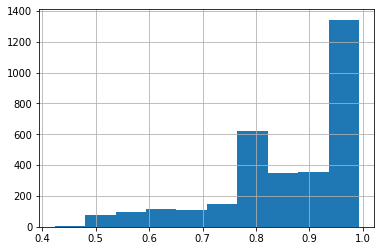

In [ ]:
tweets_df['score'].hist()

In [ ]:
"""
1) Timeseries graph for sentimensts: Done,
2) location clustering,
3) user description,
4) examples of sentiments labels,
5) Map of longitute, latitute of sentiments,
6) No of retweets: Done


"""

'\n1) Timeseries graph for sentimensts,\n2) location clustering,\n3) user description,\n4) examples of sentiments labels,\n5) Map of longitute, latitute of sentiments,\n6) No of retweets\n\n\n'

#Results and Analysis

## Sorting by Dates ascending

In [ ]:
Tweet_loc = tweets_df.sort_values(by='date', ascending=True)

In [ ]:
Tweet_loc.head()

,Unnamed: 0,user_name,user_description,user_location,user_verification,date,text,hashtags,source,preprocess_txt,total_len,sentiment,score,label
1941,1941,🌱The heart of a warrior knows no size!!,26🇵🇭🇺🇸My FFXIV art & screens! | WHM/PLD/BRD/DR...,NaN,False,2022-06-10 22:58:44,@ysaxiv ME AND THE GROUND SHOOKETH yeah it's s...,NaN,Twitter for Android,"[ysaxiv, ground, shooketh, yeah, interesting, ...",16,1,0.915735,POS
3067,3067,ђ๏гรєฬ๏๓єภ ๏Ŧ Շђє ๓๒Շเ,Now including INTX and INFX.,Da Cronx,False,2022-06-10 23:01:59,"“To answer this question, we have to move away...",NaN,"Cheap Bots, Done Quick!","[answer, question, move, away, normal, pattern...",27,0,0.966778,NEU
1940,1940,astel,Simply here to enjoy and have a good time in F...,Mirage Crown Hotel,False,2022-06-10 23:19:09,@popoto_root It makes me laugh sometimes when ...,NaN,Twitter Web App,"[popoto, root, make, laugh, sometimes, recogni...",14,-1,0.905591,NEG
71,71,davisthecrusader,NaN,NaN,False,2022-06-10 23:23:46,The Cross River Gorilla share 94.6% of our DNA...,NaN,"Cheap Bots, Done Quick!","[cross, river, gorilla, share, dna, http, co, ...",9,0,0.939718,NEU
1430,1430,Wildlife Conservation Network,"Together, we can help save endangered wildlife...",Worldwide,True,2022-06-10 23:24:49,Saiga antelope are one of the fastest declinin...,NaN,Sprout Social,"[saiga, antelope, one, fastest, declining, mam...",31,0,0.675152,NEU


## One hot Encode Sentiment Labels

In [ ]:
Tweet_loc['label'] = Tweet_loc['sentiment']

In [ ]:
def get_label(x):
  if x == 'POS':
    return 1
  elif x == 'NEU':
    return 0
  else:
    return -1

In [ ]:
Tweet_loc['sentiment'] = Tweet_loc['sentiment'].apply(lambda x : get_label(x))

In [ ]:
Tweet_loc.head()

,Unnamed: 0,user_name,user_description,user_location,user_verification,date,text,hashtags,source,preprocess_txt,total_len,sentiment,score,label
1941,1941,🌱The heart of a warrior knows no size!!,26🇵🇭🇺🇸My FFXIV art & screens! | WHM/PLD/BRD/DR...,NaN,False,2022-06-10 22:58:44,@ysaxiv ME AND THE GROUND SHOOKETH yeah it's s...,NaN,Twitter for Android,"[ysaxiv, ground, shooketh, yeah, interesting, ...",16,1,0.915735,POS
3067,3067,ђ๏гรєฬ๏๓єภ ๏Ŧ Շђє ๓๒Շเ,Now including INTX and INFX.,Da Cronx,False,2022-06-10 23:01:59,"“To answer this question, we have to move away...",NaN,"Cheap Bots, Done Quick!","[answer, question, move, away, normal, pattern...",27,0,0.966778,NEU
1940,1940,astel,Simply here to enjoy and have a good time in F...,Mirage Crown Hotel,False,2022-06-10 23:19:09,@popoto_root It makes me laugh sometimes when ...,NaN,Twitter Web App,"[popoto, root, make, laugh, sometimes, recogni...",14,-1,0.905591,NEG
71,71,davisthecrusader,NaN,NaN,False,2022-06-10 23:23:46,The Cross River Gorilla share 94.6% of our DNA...,NaN,"Cheap Bots, Done Quick!","[cross, river, gorilla, share, dna, http, co, ...",9,0,0.939718,NEU
1430,1430,Wildlife Conservation Network,"Together, we can help save endangered wildlife...",Worldwide,True,2022-06-10 23:24:49,Saiga antelope are one of the fastest declinin...,NaN,Sprout Social,"[saiga, antelope, one, fastest, declining, mam...",31,0,0.675152,NEU


In [ ]:
Tweet_loc['sentiment'].value_counts()

 0    1596
 1    1147
-1     499
Name: sentiment, dtype: int64

## Clustering Sentiments based on day

In [ ]:
Tweet_loc.shape

(3242, 14)

In [ ]:
Tweet_loc['date'][0]

'2022-06-20 02:22:32'

In [ ]:
dc = dict()

In [ ]:
for date in Tweet_loc['date']:
  dc[date[:10]] = {'pos': 0,
                   'neg': 0,
                   'neu': 0}

In [ ]:
dc

{'2022-06-10': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-11': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-12': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-13': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-14': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-15': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-16': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-17': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-18': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-19': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-20': {'neg': 0, 'neu': 0, 'pos': 0}}

In [ ]:
for i in range(Tweet_loc.shape[0]):
  date = Tweet_loc['date'][i][:10]
  senti = Tweet_loc['sentiment'][i]
  if senti == 1:
    dc[date]['pos'] += 1
  elif senti == -1:
    dc[date]['neg'] += 1
  else:
    dc[date]['neu'] += 1

In [ ]:
dc

{'2022-06-10': {'neg': 2, 'neu': 4, 'pos': 4},
 '2022-06-11': {'neg': 26, 'neu': 157, 'pos': 125},
 '2022-06-12': {'neg': 24, 'neu': 91, 'pos': 86},
 '2022-06-13': {'neg': 20, 'neu': 84, 'pos': 72},
 '2022-06-14': {'neg': 32, 'neu': 202, 'pos': 85},
 '2022-06-15': {'neg': 70, 'neu': 219, 'pos': 132},
 '2022-06-16': {'neg': 66, 'neu': 182, 'pos': 169},
 '2022-06-17': {'neg': 115, 'neu': 262, 'pos': 299},
 '2022-06-18': {'neg': 73, 'neu': 163, 'pos': 73},
 '2022-06-19': {'neg': 61, 'neu': 171, 'pos': 81},
 '2022-06-20': {'neg': 10, 'neu': 61, 'pos': 21}}

In [ ]:
for k in dc:
  print(k)

2022-06-10
2022-06-11
2022-06-12
2022-06-13
2022-06-14
2022-06-15
2022-06-16
2022-06-17
2022-06-18
2022-06-19
2022-06-20


In [ ]:
neg = []
pos = []
neu = []
dates = []

for k in dc:
  dates.append(k)
  v = dc[k]
  neg.append(v['neg'])
  pos.append(v['pos'])
  neu.append(v['neu'])

## Plots for sentiments vs dates

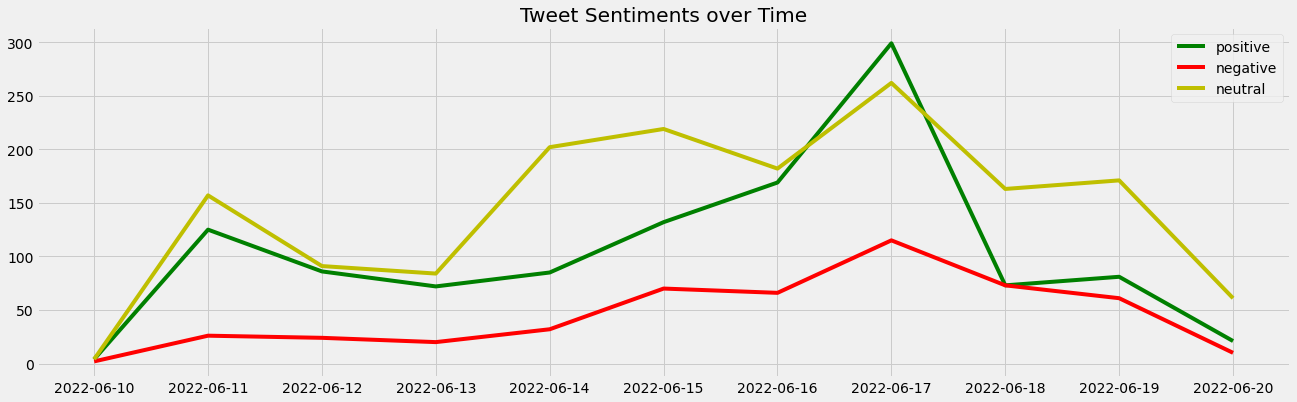

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(dates,pos,'g',label='positive')
plt.plot(dates,neg,'r',label='negative')
plt.plot(dates,neu,'y',label='neutral')
plt.title("Tweet Sentiments over Time")
plt.legend()
plt.show()

In [ ]:
import numpy as np

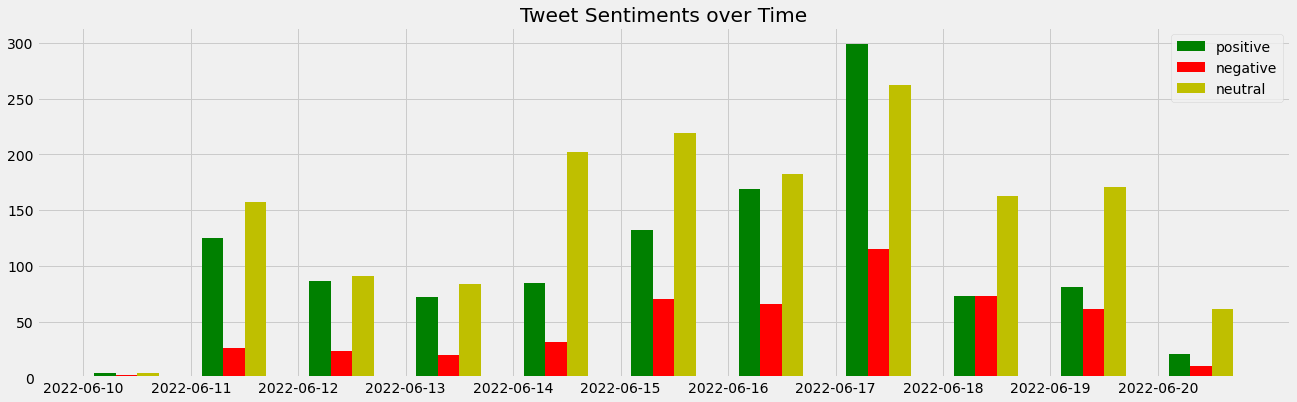

In [ ]:
xaxis = np.arange(len(dates))
plt.figure(figsize=(20,6))
plt.bar(xaxis+0.2,pos,width=0.2,color='g',label='positive')
plt.bar(xaxis+0.2*2,neg,width=0.2,color='r',label='negative')
plt.bar(xaxis+0.2*3,neu,width=0.2,color='y',label='neutral')
plt.xticks(xaxis,dates)
plt.title("Tweet Sentiments over Time")
plt.legend()
plt.show()